In [1]:
# load necessary libraries
import pandas as pd
import numpy as np

In [2]:
uploaded_data = pd.read_csv("C:/Users/harik/python pratice/17 - rnn_lstm-20251216T065313Z-1-001/17 - rnn_lstm/daily_energy_consumption.csv")
uploaded_data.head()

,Date,Consumption (kWh),Temperature (°C),Humidity (%)
0,01-01-2021,3547,18.90,39.34
1,02-01-2021,3947,8.05,50.24
2,03-01-2021,4959,26.60,88.63
3,04-01-2021,3813,8.98,24.73
4,05-01-2021,3583,17.08,56.31


In [3]:
# Convert 'Date' column to datetime, specifying the correct format
uploaded_data['Date'] = pd.to_datetime(uploaded_data['Date'], format='%d-%m-%Y') # specify format as day-month-year
uploaded_data.head()

,Date,Consumption (kWh),Temperature (°C),Humidity (%)
0,2021-01-01,3547,18.90,39.34
1,2021-01-02,3947,8.05,50.24
2,2021-01-03,4959,26.60,88.63
3,2021-01-04,3813,8.98,24.73
4,2021-01-05,3583,17.08,56.31


In [4]:
# Set Date as index for easier plotting
uploaded_data.set_index('Date', inplace=True)
uploaded_data.head()

,Consumption (kWh),Temperature (°C),Humidity (%)
Date,,,
2021-01-01,3547,18.90,39.34
2021-01-02,3947,8.05,50.24
2021-01-03,4959,26.60,88.63
2021-01-04,3813,8.98,24.73
2021-01-05,3583,17.08,56.31


In [5]:
uploaded_data.shape

(730, 3)

**Step 1: Visualize Daily Energy Consumption Trend**

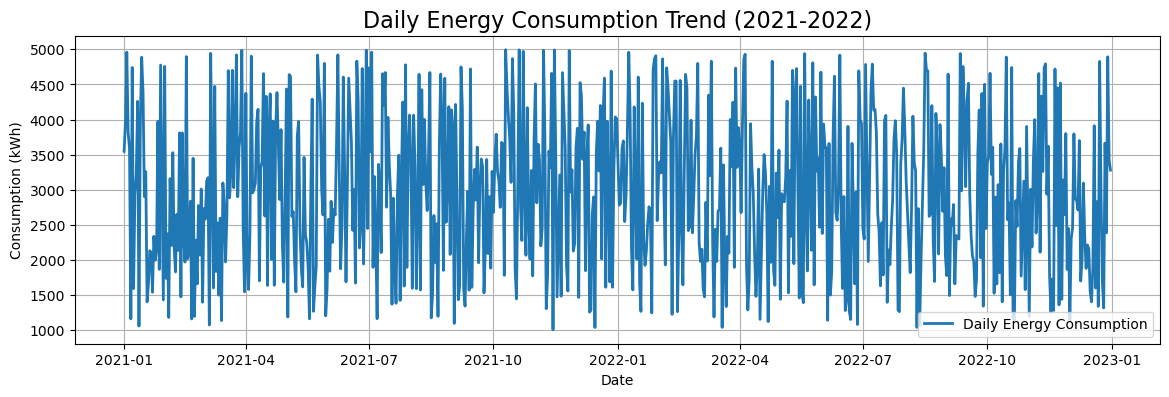

In [6]:
# Plot the daily energy consumption
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.title('Daily Energy Consumption Trend (2021-2022)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')


plt.plot(uploaded_data['Consumption (kWh)'], label='Daily Energy Consumption', linewidth=2)

plt.legend()
plt.grid(True)
plt.show()

**Step 2: Prepare Data for RNN Model**  
Now we'll prepare the dataset:

*   Select only the **Consumption (kWh)** as the feature.
*   **Normalize** the values (important for RNNs).
*   **Create sequences** (past 30 days → predict next day).

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [8]:
# Use only 'Consumption (kWh)' for forecasting
consumption_data = uploaded_data[['Consumption (kWh)']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
consumption_scaled = scaler.fit_transform(consumption_data)

In [9]:
# Prepare sequences (last 30 days --> predict next day)
X = []
y = []
n_steps = 30

for i in range(n_steps, len(consumption_scaled)):
    X.append(consumption_scaled[i-n_steps:i, 0])
    y.append(consumption_scaled[i, 0])

X, y = np.array(X), np.array(y)

X.shape, y.shape

((700, 30), (700,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

In [11]:
# Build RNN Model
model = Sequential()
#model.add(SimpleRNN(50, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

C:\Users\harik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mse')

In [13]:
# Train Model
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1653 - val_loss: 0.0897
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0846 - val_loss: 0.0784
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0807 - val_loss: 0.0778
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0804 - val_loss: 0.0778
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0807 - val_loss: 0.0775
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0810 - val_loss: 0.0772
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0805 - val_loss: 0.0775
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0805 - val_loss: 0.0768
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0802 - val_loss: 0.0792
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0803 - val_loss: 0.0769
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0797 - val_loss: 0.0776
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

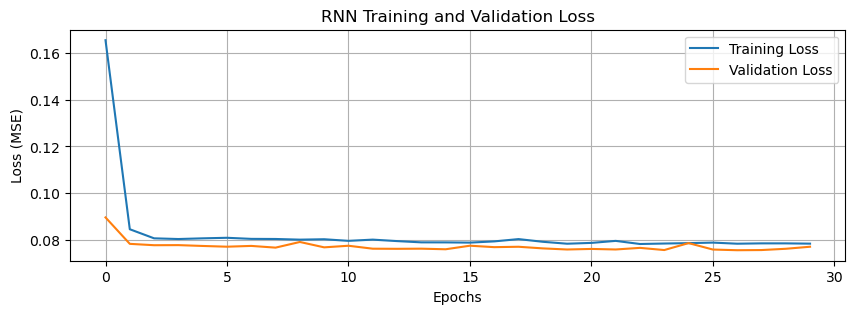

In [14]:
# Plot Loss
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Example: Predict next day's consumption
last_30_days = consumption_scaled[-30:]
last_30_days.shape

(30, 1)

In [16]:
last_30_days = last_30_days.reshape((1, n_steps, 1))
last_30_days.shape

(1, 30, 1)

In [17]:
predicted_scaled = model.predict(last_30_days)
predicted_kwh = scaler.inverse_transform(predicted_scaled)

print(f"Predicted next day's consumption: {predicted_kwh[0][0]:.2f} kWh")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Predicted next day's consumption: 2990.05 kWh


In [18]:
predicted_scaled

array([[0.4973799]], dtype=float32)